In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv(r"C:\Users\adabh\OneDrive\Desktop\files\Machine learning\ml\machine learning\Supervised learning\Regression\data_sets\Student_score.csv")

In [15]:
print(df.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [16]:
df.shape

(25, 2)

In [17]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [20]:
df.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [21]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

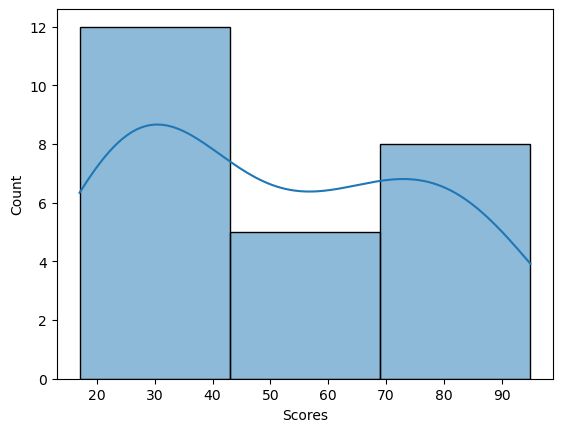

In [24]:
# constructin histplot
sns.histplot(df["Scores"],bins=3, kde=True)
plt.show()

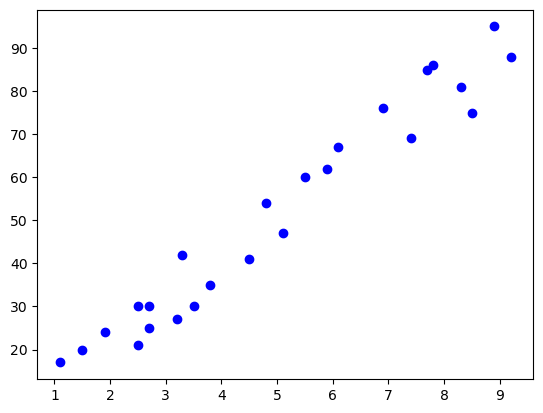

In [ ]:
# creating scatter plot for the marks according to the hours studied
plt.scatter(df["Hours"], df["Scores"], color="blue", label="Data Points")
plt.show()

In [37]:
x = np.array(df['Hours'])
y = np.array(df['Scores'])

#mean of x and y
x_mean = np.mean(x)
y_mean = np.mean(y)

#slope of the line
numerator = np.sum((x-x_mean)*(y-y_mean))
denominator = np.sum((x-x_mean)**2)
m = numerator / denominator
b=y_mean - m*x_mean

#print the model: y= mx+b
print(f"Linear Regression model using least squares method: y= {m:.2f}x+{b:.2f}")

#predict the values of y
y_pred = m*x+b
print("predicted values of y:", y_pred)
print("Total error:",np.sum((y - y_pred)**2))

Linear Regression model using least squares method: y= 9.78x+2.48
predicted values of y: [26.92318188 52.3402707  33.76624426 85.57800223 36.69898527 17.14737849
 92.4210646  56.25059205 83.62284155 28.87834256 77.75735951 60.16091341
 46.47478866 34.74382459 13.23705714 89.48832358 26.92318188 21.05769985
 62.11607409 74.8246185  28.87834256 49.40752968 39.63172629 69.9367168
 78.73493985]
Total error: 722.0682627311365


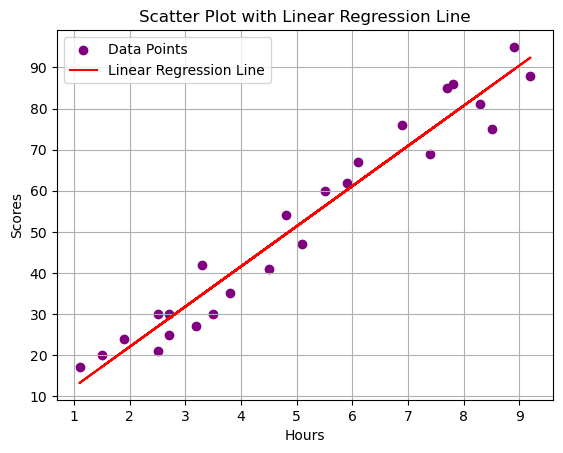

In [32]:
plt.scatter(x, y, color='purple', label='Data Points')
plt.plot(x, y_pred, color='red', label='Linear Regression Line')

plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scatter Plot with Linear Regression Line')
plt.legend()

plt.grid(True)
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# Features and target variable
X = df[['Hours']]  # Independent variable (Study Hours)
y = df['Scores']   # Dependent variable (Exam Scores)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)

# Print the equation of the regression line
print(f"Linear Regression model: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Linear Regression model: y = 9.68x + 2.83
Mean Squared Error: 18.94
Root Mean Squared Error: 4.35
R² Score: 0.9678


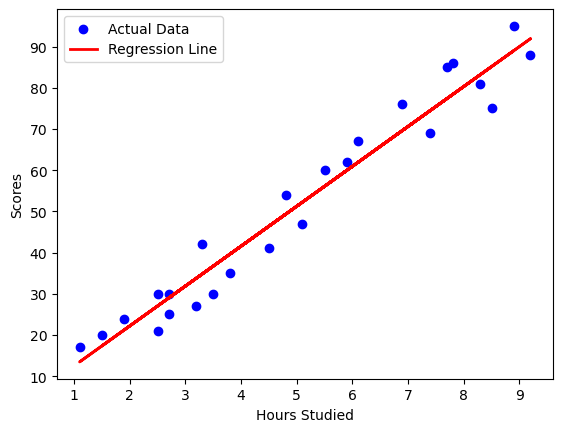

In [36]:
# Visualize the regression line
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, model.predict(X), color='red', linewidth=2, label="Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.legend()
plt.show()